# Madwick filter

example of a Madwick filter for computing the orientation of a 6 axis IMU (acceleration, gyroscope) using the ahrs library.


## Import

In [4]:
from ahrs.filters import Madgwick
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ahrs import Quaternion

## Load the data and clean

In [5]:
df = pd.read_csv(r"./../../data/NONAN_Gaitprint/S001/S001/S001_1_cycle.csv")

In [6]:
acc_col = [
'Noraxon MyoMotion-Segments-Foot RT-Acceleration-x (mG)',
'Noraxon MyoMotion-Segments-Foot RT-Acceleration-y (mG)',
'Noraxon MyoMotion-Segments-Foot RT-Acceleration-z (mG)'
]

gyr_col = [
'Noraxon MyoMotion-Segments-Foot RT-Gyroscope-x (deg/s)',
'Noraxon MyoMotion-Segments-Foot RT-Gyroscope-y (deg/s)',
'Noraxon MyoMotion-Segments-Foot RT-Gyroscope-z (deg/s)'
]

In [7]:
gyro_data = np.deg2rad(df[gyr_col].to_numpy())
acc_data = df[acc_col].to_numpy()*9.81/1000
time = df['time'].to_numpy()
fs = len(time)/time[-1] - time[0]

## Diplay the gyroscope and acceleation data

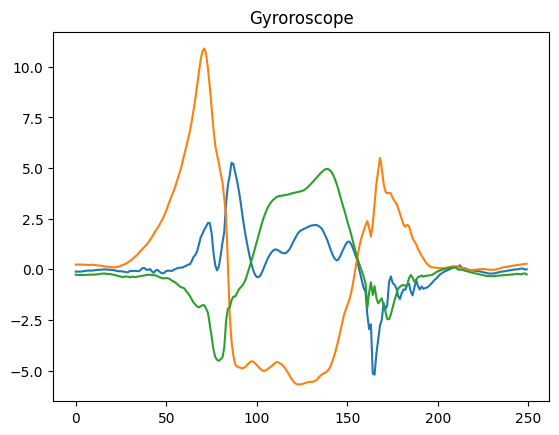

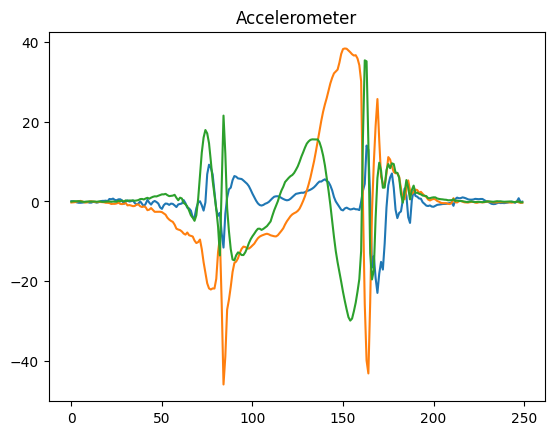

In [12]:
plt.figure()
plt.title("Gyroroscope")
plt.plot(gyro_data)
plt.show()

plt.figure()
plt.title("Accelerometer")
plt.plot(acc_data)
plt.show()

## Computation the orientation

when calling the Madwock function, the quaternion are computed, we can then transform the quaternion in a more understandle signal: euler angles

In [9]:
madgwick = Madgwick(gyr=gyro_data, acc=acc_data, frequency=fs, 
                    gain= 0.09, q0=[1,0,0,0])

## Euler angle transformation

In [10]:
euler = np.zeros((len(madgwick.Q), 3))
for i, q in enumerate(madgwick.Q):
    euler[i,:] = Quaternion(q).to_angles()

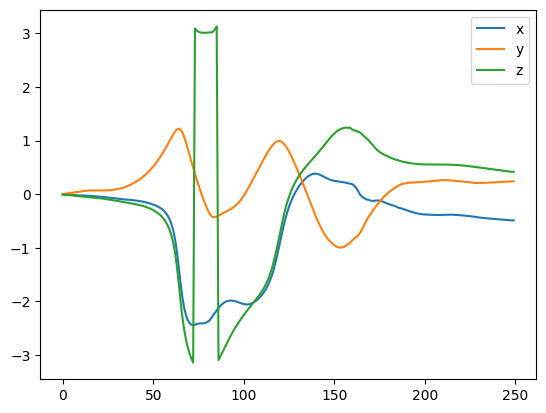

end


In [11]:
plt.figure()
plt.plot(euler[:,0], label="x")
plt.plot(euler[:,1], label="y")
plt.plot(euler[:,2], label="z")
plt.legend()
plt.show()

print("end")

The angles around x and y seems not very accurate (knowlegde based), we could optimise the results by playing with the the parameter of Madwick (gain) and/or split the init and the update pahse of madwick to more accurately set the gain.

On Z, a gimbal lock efect can be seen